# Visualizing & Making Predictions with Financial Data

In this module, we design an algorithm that predicts trends in the close prices of Stooq Index Data: https://stooq.com/db/.
More info on remote data access can be found with the Pandas Data Reader Documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#stooq-index-data. 

First start by running the following commands to install the Plotly, Pandas Data Reader, and Plotly Express packages, if you haven't already:

In [ ]:
%pip install plotly
%pip install pandas_datareader
!pip install plotly_express

Import the relevant libraries:

In [188]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import pandas_datareader as web
import datetime as dt

import plotly.express as px

Import the data:

In [189]:
# name, source, start, end
data = web.DataReader('^DJI', 'stooq')
data.head

<bound method NDFrame.head of                 Open      High       Low     Close     Volume
Date                                                         
2021-11-02  35935.11  36088.81  35884.13  36052.63  280948491
2021-11-01  35833.65  36009.74  35797.97  35913.84  344396909
2021-10-29  35712.28  35852.53  35633.20  35819.56  459864198
2021-10-28  35545.41  35742.25  35545.41  35730.48  383302764
2021-10-27  35835.43  35835.43  35490.43  35490.69  399667682
...              ...       ...       ...       ...        ...
2016-11-09  18317.26  18650.06  18252.55  18589.69  173069019
2016-11-08  18251.38  18400.50  18200.75  18332.74   79824057
2016-11-07  17994.64  18263.30  17994.64  18259.60   93449575
2016-11-04  17928.35  17986.76  17883.56  17888.28   97760180
2016-11-03  17978.75  18006.96  17904.07  17930.67   77869221

[1258 rows x 5 columns]>

In order to visualize our data, we create a line graph using the Plotly Express library:

In [194]:
px.line(data, y = ['Open', 'High', 'Low', 'Close'])

Now, we partition the data, with the first 100 rows of the "Close" column serving as our "training" data and the rest as our "testing" data. Like the name suggests, we will train our algorithm on our "training" data and compare our algorithm's predictions to the "testing" data. 

In [195]:
train_data = pd.DataFrame(data['Close'].iloc[:100]) 
train_data

,Close
Date,
2021-11-02,36052.63
2021-11-01,35913.84
2021-10-29,35819.56
2021-10-28,35730.48
2021-10-27,35490.69
...,...
2021-06-18,33290.08
2021-06-17,33823.45
2021-06-16,34033.67


In [196]:
# in order to ensure all of our data types are consistent, we set our training data to be of data type 'float64'
train_data['Close'] = train_data['Close'].astype(float)

There are many ways we can choose to visualize our testing data. Below are some examples of generated plots using the Matplotlib and Plotly Express libraries:

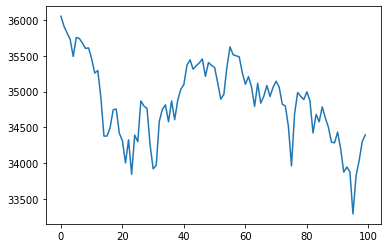

In [197]:
plt.plot(train_data['Close'].to_numpy())

In [198]:
px.line(train_data)

We create a new column that is the same as our Close test data, but shifted one day back. This way, we can use the previous day's Close values to learn today's. 

In [199]:
train_data['lag_1'] = train_data['Close'].shift(1)
train_data

,Close,lag_1
Date,,
2021-11-02,36052.63,NaN
2021-11-01,35913.84,36052.63
2021-10-29,35819.56,35913.84
2021-10-28,35730.48,35819.56
2021-10-27,35490.69,35730.48
...,...,...
2021-06-18,33290.08,33876.97
2021-06-17,33823.45,33290.08
2021-06-16,34033.67,33823.45


We do this 6 more times, to generate data for one week:

In [200]:
for i in range(2,8):
    train_data[f'lag_{i}'] = train_data['Close'].shift(i)
train_data

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-11-02,36052.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01,35913.84,36052.63,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,35819.56,35913.84,36052.63,NaN,NaN,NaN,NaN,NaN
2021-10-28,35730.48,35819.56,35913.84,36052.63,NaN,NaN,NaN,NaN
2021-10-27,35490.69,35730.48,35819.56,35913.84,36052.63,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-06-18,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27,34292.29
2021-06-17,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27
2021-06-16,34033.67,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84


In [201]:
# drops the N/A values
train_data = train_data.dropna()
train_data

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-10-22,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56,35913.84,36052.63
2021-10-21,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56,35913.84
2021-10-20,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56
2021-10-19,35457.31,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48
2021-10-18,35258.61,35457.31,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69
...,...,...,...,...,...,...,...,...
2021-06-18,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27,34292.29
2021-06-17,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27
2021-06-16,34033.67,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84


We want to find $w_i$, i = 1, ..., 7, such that: $w_1*lag_1^j + ... + w_7*lag_7^j ~= Close^j$, where j = 1, ..., 93 corresponds to the rows of our data matrix.

In [202]:
# create an array for the columns with the previous days' data:
cols = [f'lag_{i}' for i in range(1,8)]

# convert the training data into numpy arrays. again, to keep the data types consistent, we use float64 for all of our variables. 
A = train_data[cols].to_numpy(dtype='float64')
y = train_data['Close'].to_numpy(dtype='float64')

We want to find the vector w such that: $Aw ~= y$. So, we employ the use of Normal Equations in order to minimize the residual, $|Aw - y|$: 

$A^{\top} A \hat{w} = A^{\top} y \to \hat{w} = (A^{\top} A)^{-1} A^{\top} y$ 

Note that this is comuptationally expensive! For larger-scale problems, it's more efficient to use gradient-descent, but for our purposes, the Normal Equations should work just fine.

In [203]:
# we use the numpy library to perform matrix/vector multiplication:
w_hat = np.linalg.inv(A.T @ A) @ A.T @ y

In [205]:
train_data['predictions'] = A @ w_hat

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now, we use the Plotly Express library again to see how our predictions match up to the training data:

In [206]:
px.line(train_data, y = ['Close', 'predictions'])

As you can see, our predictions were relatively good. Now, we can try to improve our algorithm by introducing bias.

In [207]:
# we add a column of 1's to our training data:
train_data['ones'] = np.ones(len(train_data['Close']))
cols.append('ones')

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
train_data

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones
Date,,,,,,,,,,
2021-10-22,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56,35913.84,36052.63,35773.050223,1.0
2021-10-21,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56,35913.84,35646.566386,1.0
2021-10-20,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48,35819.56,35616.553220,1.0
2021-10-19,35457.31,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69,35730.48,35530.121564,1.0
2021-10-18,35258.61,35457.31,35609.34,35603.08,35677.02,35741.15,35756.88,35490.69,35471.986483,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-18,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27,34292.29,33904.860039,1.0
2021-06-17,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,34283.27,33410.528717,1.0
2021-06-16,34033.67,33823.45,33290.08,33876.97,33945.58,33874.24,34196.82,34433.84,33858.598667,1.0


Especially on high volatility days, we need to be able to add some bias (lifting the graph off the origin):
$y = w_1*\text{lag}_1 + b$. 
So, we add an eighth weight to account for bias. 

In [212]:
# introduce bias
A_bias = train_data[cols].to_numpy(dtype='float64')
w_hat_bias = np.linalg.inv(A_bias.T @ A_bias) @ A_bias.T @ y

In [168]:
train_data['predictions_with_bias'] = A_bias @ w_hat_bias

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
px.line(train_data, y=['Close', 'predictions', 'predictions_with_bias'])

As one can see, it's relatively difficult to tell if that did any better than without the bias. Therefore, we need a way to calculate the error. We use the following: 

Mean root squared error = MRSE = $\frac{1}{2m} \sqrt{\sum_{i=1}^m (y_i - \hat{y}_i)^2}$

In [170]:
y
y_hat1 = train_data['predictions'].to_numpy(dtype='float64')
y_hat2 = train_data['predictions_with_bias'].to_numpy(dtype='float64')

In [213]:
# define the MSRE:
def MSRE(labels, predictions):
    return np.sqrt((labels - predictions)@(labels - predictions))

In [172]:
print(f'In-Sample MSRE without bias = {MSRE(y, y_hat1)}')
print(f'In-Sample MSRE with bias = {MSRE(y, y_hat2)}')

In-Sample MSRE without bias = 2379.683595464289
In-Sample MSRE with bias = 2332.3992776930622


In [173]:
# we can also change our scale to better observe changes in data:
data['log_Close'] = np.log(data['Close'])

In [174]:
px.line(data, y = 'log_Close')

In [176]:
# we test our algorithm on our test data (i.e. the data we did not use to train the algorithm)
test_data = data['Close'].iloc[-100:]

In [177]:
A_bias.shape

(93, 8)

In [178]:
test_data = pd.DataFrame(test_data)
test_data

,Close
Date,
2017-03-29,20659.32
2017-03-28,20701.50
2017-03-27,20550.98
2017-03-24,20596.72
2017-03-23,20656.58
...,...
2016-11-09,18589.69
2016-11-08,18332.74
2016-11-07,18259.60


In [180]:
# again, we create our data matrix over the span of a week, and add a column of ones that we can use to introduce bias. 
cols = []
for i in range(1,8):
    test_data[f'lag_{i}'] = test_data['Close'].shift(i)
    cols.append(f'lag_{i}')
test_data = test_data.dropna()
test_data['ones'] = np.ones(len(test_data))
cols.append('ones')

/Users/rachaelalfant/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
test_data

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones
Date,,,,,,,,,
2017-03-09,20858.19,20902.98,20881.48,20837.37,20950.10,20934.55,20914.62,20905.86,1.0
2017-03-08,20855.73,20858.19,20902.98,20881.48,20837.37,20950.10,20934.55,20914.62,1.0
2017-03-07,20924.76,20855.73,20858.19,20902.98,20881.48,20837.37,20950.10,20934.55,1.0
2017-03-06,20954.34,20924.76,20855.73,20858.19,20902.98,20881.48,20837.37,20950.10,1.0
2017-03-03,21005.71,20954.34,20924.76,20855.73,20858.19,20902.98,20881.48,20837.37,1.0
...,...,...,...,...,...,...,...,...,...
2016-11-09,18589.69,18807.88,18847.66,18868.69,18923.06,18868.14,18903.82,18867.93,1.0
2016-11-08,18332.74,18589.69,18807.88,18847.66,18868.69,18923.06,18868.14,18903.82,1.0
2016-11-07,18259.60,18332.74,18589.69,18807.88,18847.66,18868.69,18923.06,18868.14,1.0


In [182]:
w_hat_bias

array([ 8.52811925e-01,  3.60454403e-02, -1.37765291e-01,  8.87431575e-02,
       -1.50725151e-01,  2.40405712e-01, -4.23227944e-02,  3.90364635e+03])

In [183]:
test_data['predictions'] = test_data[cols].to_numpy() @ w_hat_bias

In [184]:
y = test_data['Close'].to_numpy()
y_hat = test_data['predictions'].to_numpy()
print(f'MSRE = {MSRE(y, y_hat)}')

MSRE = 15907.942549901809


In [186]:
px.line(test_data, y = ['Close', 'predictions'])

Interestingly, although our algorithm did not exactly predict Close prices, it accurately identified the trends/trajectories of these prices. 